# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/jay/bootcamp_Jingdong_Yang/project/data/high_frequency_data1.csv')
df.head()

,Unnamed: 0,index,OBJECT_ID,S_INFO_WINDCODE,TRADE_DT,S_LI_INITIATIVEBUYRATE,S_LI_INITIATIVEBUYMONEY,S_LI_INITIATIVEBUYAMOUNT,S_LI_INITIATIVESELLRATE,S_LI_INITIATIVESELLMONEY,...,S_LI_LARGESELLAMOUNT,S_LI_ENTRUSTRATE,S_LI_ENTRUDIFFERAMOUNT,S_LI_ENTRUDIFFERAMONEY,S_LI_ENTRUSTBUYMONEY,S_LI_ENTRUSTSELLMONEY,S_LI_ENTRUSTBUYAMOUNT,S_LI_ENTRUSTSELLAMOUNT,OPDATE,OPMODE
0,0,0,{7438C494-0A46-479E-B87D-3E0A26274AA1},601788.SH,20100701,0.4373,3811.3023,24974.40,0.4397,3832.3663,...,15475.16,-41.8941,-7715.80,14.8307,358.6226,343.7919,5350.80,13066.60,2010-12-12 20:47:10,0.0
1,1,1,{61BB5DA3-0DE3-4236-9F7D-FFB48D1A9A9F},601788.SH,20100702,0.3967,4583.7052,30283.01,0.4142,4785.4513,...,23127.60,-38.2387,-6139.43,274.3276,296.7584,22.4309,4958.05,11097.48,2010-12-12 20:48:06,0.0
2,2,2,{7B6849FC-DB52-401F-BFF9-E9B7FFA03A39},601788.SH,20100705,0.3989,3080.9565,20644.99,0.4872,3763.2861,...,15632.22,-22.1648,-3773.28,-222.3545,98.9471,321.3016,6625.22,10398.50,2010-12-12 20:48:55,0.0
3,3,3,{EF1E030D-A548-4CFD-8286-79E695CAA463},601788.SH,20100706,0.4770,4005.1611,26581.02,0.4012,3368.2731,...,11055.55,-23.7974,-3578.29,255.0756,415.3722,160.2966,5729.09,9307.38,2010-12-12 20:49:40,0.0
4,4,4,{99A23B9A-B155-48CE-A5D5-774A316B9739},601788.SH,20100707,0.4613,4831.1144,31769.69,0.3378,3538.1695,...,17919.36,-24.7006,-4428.90,98.5951,145.3097,46.7145,6750.71,11179.61,2010-12-12 20:50:14,0.0


# Feature Engineering for High-Frequency Trading Data

## Feature 1: Buy-Sell Pressure Ratio
Rationale: This normalized feature captures the relative strength of buying vs selling activity by comparing initiative buy and sell rates. Values close to +1 indicate strong buying pressure, while values close to -1 indicate strong selling pressure. This is crucial for predicting short-term price movements as it reflects market sentiment and order flow dynamics.

In [8]:
df['buy_sell_pressure'] = (df['S_LI_INITIATIVEBUYRATE'] - df['S_LI_INITIATIVESELLRATE']) / (df['S_LI_INITIATIVEBUYRATE'] + df['S_LI_INITIATIVESELLRATE'] + 1e-8)
df.buy_sell_pressure


0       -0.002737
1       -0.021581
2       -0.099650
3        0.086313
4        0.154549
           ...   
33209   -0.181146
33210    0.315477
33211    0.034160
33212    0.094501
33213         NaN
Name: buy_sell_pressure, Length: 33214, dtype: float64

# Feature 2: Large Order Imbalance
Rationale: This feature focuses specifically on large orders, which often represent institutional trading and can have significant market impact. The imbalance between large buy and sell amounts can signal major market moves before they're reflected in price, making it valuable for predictive modeling.

In [9]:
df['large_order_imbalance'] = (df['S_LI_LARGEBUYAMOUNT'] - df['S_LI_LARGESELLAMOUNT']) / (df['S_LI_LARGEBUYAMOUNT'] + df['S_LI_LARGESELLAMOUNT'] + 1e-8)
df.large_order_imbalance

0        0.007112
1       -0.045796
2       -0.280074
3        0.087717
4        0.093166
           ...   
33209   -0.469958
33210    0.215621
33211   -0.110329
33212   -0.030697
33213         NaN
Name: large_order_imbalance, Length: 33214, dtype: float64

# Feature 3: Entrust Order Flow Imbalance
Rationale: The entrust (order book) data reflects pending market intentions. Imbalances in order book flow can predict short-term price movements as they represent unfulfilled demand/supply that may drive future price action.


In [13]:
df['entrust_flow_imbalance'] = (df['S_LI_ENTRUSTBUYAMOUNT'] - df['S_LI_ENTRUSTSELLAMOUNT']) / (df['S_LI_ENTRUSTBUYAMOUNT'] + df['S_LI_ENTRUSTSELLAMOUNT'] + 1e-8)
df.entrust_flow_imbalance

0       -0.418941
1       -0.382387
2       -0.221648
3       -0.237974
4       -0.247006
           ...   
33209   -0.611722
33210   -0.415273
33211   -0.640067
33212   -0.712039
33213         NaN
Name: entrust_flow_imbalance, Length: 33214, dtype: float64

These features are particularly valuable for high-frequency trading models because they:
1. Capture market microstructure effects
2. Provide early signals of price direction
3. Normalize different scales of trading activity
4. Extracting implicit price and volume information

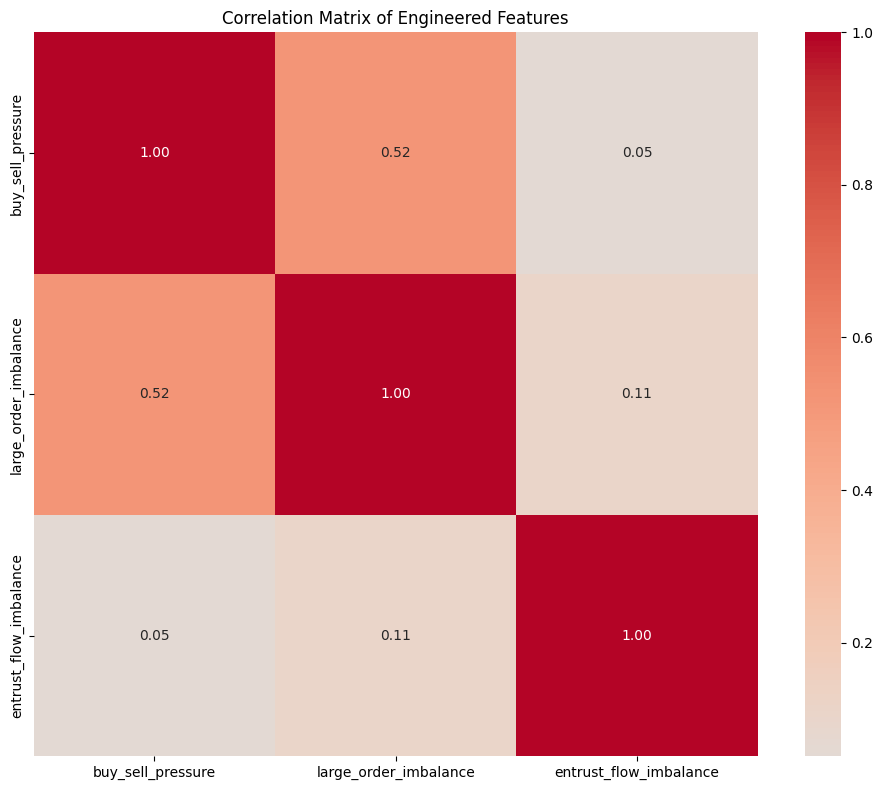

Feature engineering completed successfully!
Created 3 new features for high-frequency trading analysis.


In [15]:
# Validation and Final Checks

# Check correlation between engineered features to avoid multicollinearity
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric engineered features for correlation analysis
numeric_features = ['buy_sell_pressure', 'large_order_imbalance', 'entrust_flow_imbalance']

correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Engineered Features')
plt.tight_layout()
plt.show()

print("Feature engineering completed successfully!")
print(f"Created 3 new features for high-frequency trading analysis.")